<a href="https://colab.research.google.com/github/dntwaritag/Climate-Resilience/blob/main/Summative_Intro_to_ml_Denys_Ntwaritaganzwa_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimization Techniques in Machine Learning**

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis techniques used in machine learning to improve models' performance, convergence speed, and efficiency.

A Notebook detailing the following

* Project name: **Climate Resilient**

**Model Architecture**

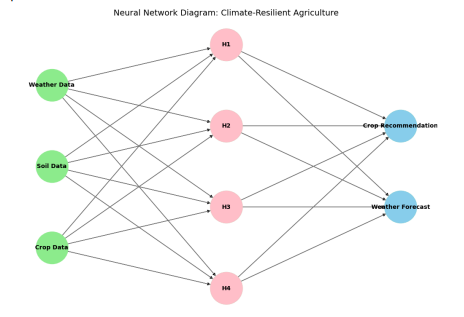

**Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score)

# Classical ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# Utility for plotting model architecture
from tensorflow.keras.utils import plot_model

import os
os.makedirs("saved_models", exist_ok=True)  # Ensure directory to save models


**Load and Explore the Dataset**

In [ ]:
# Ensure directory exists to save models
os.makedirs("saved_models", exist_ok=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Mathematics for Machine Learning/seattle-weather.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1461, 6)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Basic statistics
print("\nBasic statistics:\n", df.describe())



Missing values in each column:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Basic statistics:
        precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


**Data Preprocessing**

In [ ]:
# it's categorical, we encode it:
df['weather'] = LabelEncoder().fit_transform(df['weather'])

# Define features (X) and target (y)
X = df.drop(columns=['weather', 'date']) #Drop date column here
y = df['weather']

# Split into training (80%), temp (20%)
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split temp into validation (10% overall) and test (10% overall)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train_full.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1168, 4)
Validation set size: (146, 4)
Test set size: (147, 4)


**Correlation Heatmap and Feature Distribution**

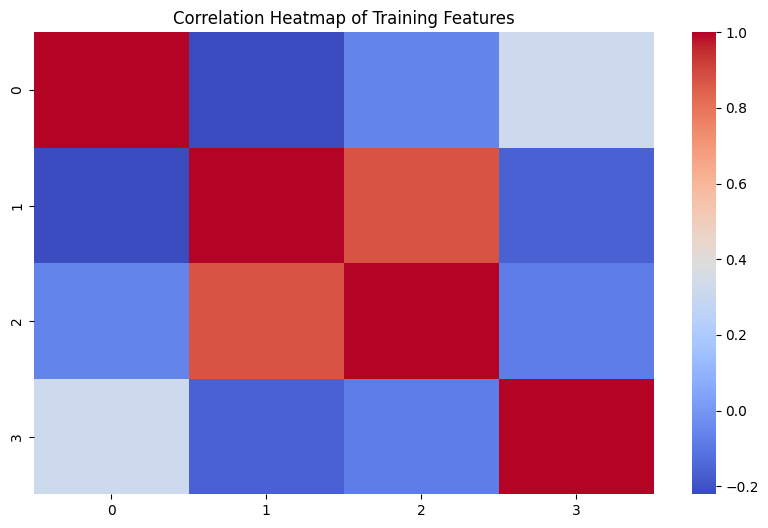

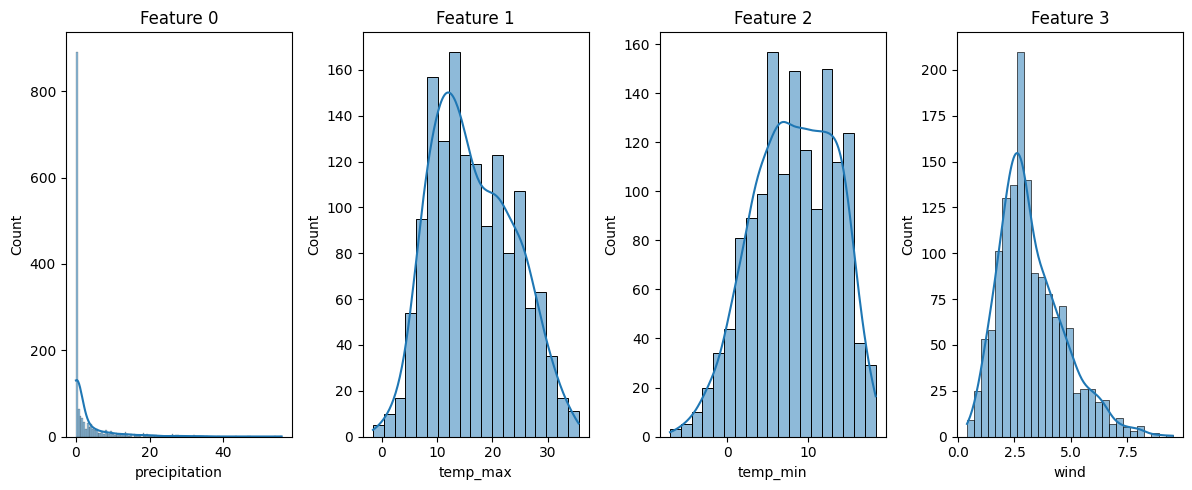

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_train_full).corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Training Features')
plt.show()

# (Optional) Distribution of a few selected features
plt.figure(figsize=(15, 5))
for i in range(min(5, X.shape[1])):  # Plot up to 5 features
    plt.subplot(1, 5, i+1)
    sns.histplot(X.iloc[:, i], kde=True) # Changed X[:, i] to X.iloc[:, i]
    plt.title(f"Feature {i}")
plt.tight_layout()
plt.show()

**Classical ML Algorithm (Not a Neural Network) with Tuned Hyperparameters**

Below is an example using SVM with specific hyperparameters. You may choose any classical ML algorithm (e.g., LogisticRegression, RandomForest, XGBoost, etc.) as long as you tune at least one or two hyperparameters.

In [ ]:
# Example: SVM with tuned hyperparameters
svm_model = SVC(kernel='rbf', C=2.0, gamma='scale', probability=True)
svm_model.fit(X_train_full, y_train_full)

# Save the SVM model
joblib.dump(svm_model, "saved_models/ml_model_svm.pkl")

# Evaluation
y_pred_svm = svm_model.predict(X_test)
print("=== SVM Model (Tuned Hyperparams) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


=== SVM Model (Tuned Hyperparams) Evaluation ===
Accuracy: 0.7687074829931972
Precision: 0.6725574667463287
Recall: 0.7687074829931972
F1 Score: 0.7097803055648488

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.90      0.84      0.87        63
           3       0.00      0.00      0.00         3
           4       0.68      0.97      0.80        62

    accuracy                           0.77       147
   macro avg       0.32      0.36      0.33       147
weighted avg       0.67      0.77      0.71       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  1  0 11]
 [ 0  0 53  0 10]
 [ 0  0  3  0  0]
 [ 0  0  2  0 60]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Define a Reusable Function to Build Neural Networks**

We will build a function that accepts multiple parameters to handle different optimization techniques (regularizers, dropout, learning rate)

In [ ]:
def build_nn_model(
    input_dim, num_classes, optimizer='adam', learning_rate=0.001, regularizer=None, reg_value=0.0, dropout_rates=None, n_hidden_layers=3, n_neurons=16,
):
    """
    Builds a multi-layer neural network with the given hyperparameters.

    Args:
        input_dim (int): Number of input features.
        num_classes (int): Number of output classes.
        optimizer (str or tf.keras optimizer): The optimizer to use (e.g. 'adam', 'rmsprop').
        learning_rate (float): Learning rate for the optimizer.
        regularizer (str): 'l1' or 'l2' or None
        reg_value (float): Regularization parameter value.
        dropout_rates (list or None): List of dropout rates for each hidden layer.
        n_hidden_layers (int): Number of hidden layers (>= 3).
        n_neurons (int): Number of neurons in each hidden layer.

    Returns:
        model (tf.keras.Model): Compiled Keras model.
    """
    # Choose the appropriate regularizer
    if regularizer == 'l1':
        reg = l1(reg_value)
    elif regularizer == 'l2':
        reg = l2(reg_value)
    else:
        reg = None

    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input Layer

    # Add hidden layers
    for i in range(n_hidden_layers):
        model.add(Dense(n_neurons, activation='relu', kernel_regularizer=reg))
        if dropout_rates and i < len(dropout_rates):
            model.add(Dropout(dropout_rates[i]))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Configure optimizer with the specified learning rate
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Choose from ['adam', 'rmsprop', 'sgd'].")

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


**Helper Function to Train and Evaluate the Neural Network**

In [ ]:
def train_and_evaluate_nn(
    model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=20, batch_size=32, use_early_stopping=False, patience=3, model_name="nn_instance"
):
    """
    Trains the model and evaluates on test data. Optionally uses EarlyStopping.

    Args:
        model (tf.keras.Model): Compiled Keras model.
        X_train, y_train: Training data.
        X_val, y_val: Validation data.
        X_test, y_test: Test data.
        epochs (int): Number of epochs to train.
        batch_size (int): Batch size.
        use_early_stopping (bool): Whether to use EarlyStopping.
        patience (int): Patience for EarlyStopping.
        model_name (str): Name to save the model under.

    Returns:
        history (tf.keras.callbacks.History): Training history.
        metrics_dict (dict): Dictionary containing evaluation metrics on test data.
    """
    callbacks = []
    if use_early_stopping:
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
        callbacks.append(early_stopping)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    # Save the trained model
    model.save(f"saved_models/{model_name}.h5")

    # Evaluate on test data
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n=== Evaluation for {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    metrics_dict = {
        'model_name': model_name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    }

    return history, metrics_dict


**Neural Network - Instance 1 (No Defined Optimizer / No Early Stopping)**

Requirement: “In instance 1 - Do not define the optimizers used, do not use Early stopping. Use default.

In [ ]:
# Instance 1: Default settings (e.g., default Adam in the build function),
# No early stopping, no explicit mention of LR, dropout, or regularization.

nn_1 = build_nn_model( input_dim=X_train_full.shape[1], num_classes=len(np.unique(y_train_full)),
    # Using defaults: optimizer='adam', learning_rate=0.001.
    # No dropout_rates, no regularizer
    n_hidden_layers=3,
    n_neurons=16        # Each layer has more than 8 neurons
)

history_1, metrics_1 = train_and_evaluate_nn(model=nn_1, X_train=X_train_full, y_train=y_train_full, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, epochs=20, batch_size=32, use_early_stopping=False, model_name="nn_instance_1"
)


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2278 - loss: 1.5783 - val_accuracy: 0.6233 - val_loss: 1.4007
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6174 - loss: 1.3163 - val_accuracy: 0.6849 - val_loss: 1.2007
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 1.1063 - val_accuracy: 0.7123 - val_loss: 1.0622
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 1.0103 - val_accuracy: 0.7055 - val_loss: 0.9630
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.8948 - val_accuracy: 0.7329 - val_loss: 0.8977
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 0.8641 - val_accuracy: 0.7466 - val_loss: 0.8483
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.8377 - val_accuracy: 0.7534 - val_loss: 0.7972
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.7708 - val_accuracy: 0.7603 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

=== Evaluation for nn_instance_1 ===
Accuracy: 0.7823
Precision: 0.6748
Recall: 0.7823
F1 Score: 0.7212

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.88      0.89      0.88        63
           3       0.00      0.00      0.00         3
           4       0.71      0.95      0.81        62

    accuracy                           0.78       147
   macro avg       0.32      0.37      0.34       147
weighted avg       0.67      0.78      0.72       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  2  0 10]
 [ 0  0 56  0  7]
 [ 0  0  3  0  0]
 [ 0  0  3  0 59]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Neural Network - Instance 2 (Adam Optimizer, L2 Regularization, No Early Stopping)

In [ ]:
# Instance 2: Adam optimizer with L2 regularization, no early stopping
nn_2 = build_nn_model(input_dim=X_train_full.shape[1], num_classes=len(np.unique(y_train_full)), optimizer='adam', learning_rate=0.001, regularizer='l2', reg_value=0.01, dropout_rates=None, n_hidden_layers=3, n_neurons=16
)

history_2, metrics_2 = train_and_evaluate_nn( model=nn_2, X_train=X_train_full, y_train=y_train_full, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, epochs=30, batch_size=32, use_early_stopping=False, model_name="nn_instance_2"
)


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3691 - loss: 1.9698 - val_accuracy: 0.4932 - val_loss: 1.6818
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4418 - loss: 1.6766 - val_accuracy: 0.6507 - val_loss: 1.4155
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - loss: 1.4091 - val_accuracy: 0.7329 - val_loss: 1.2289
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 1.2092 - val_accuracy: 0.7397 - val_loss: 1.1403
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7465 - loss: 1.1146 - val_accuracy: 0.7466 - val_loss: 1.0729
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7451 - loss: 1.0376 - val_accuracy: 0.7466 - val_loss: 1.0210
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 1.0126 - val_accuracy: 0.7603 - val_loss: 0.9733
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7775 - loss: 0.9449 - val_accuracy: 0.7671 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Evaluation for nn_instance_2 ===
Accuracy: 0.7755
Precision: 0.6676
Recall: 0.7755
F1 Score: 0.7148

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.86      0.89      0.88        63
           3       0.00      0.00      0.00         3
           4       0.71      0.94      0.81        62

    accuracy                           0.78       147
   macro avg       0.31      0.36      0.34       147
weighted avg       0.67      0.78      0.71       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  2  0 10]
 [ 0  0 56  0  7]
 [ 0  0  3  0  0]
 [ 0  0  4  0 58]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Neural Network - Instance 3 (RMSprop, Dropout, Early Stopping)**

In [ ]:
# Instance 3: RMSprop with dropout and early stopping
nn_3 = build_nn_model(input_dim=X_train_full.shape[1], num_classes=len(np.unique(y_train_full)), optimizer='rmsprop', learning_rate=0.0005, regularizer=None,  reg_value=0.0, dropout_rates=[0.3, 0.3, 0.3], n_hidden_layers=3, n_neurons=16
)

history_3, metrics_3 = train_and_evaluate_nn(model=nn_3, X_train=X_train_full, y_train=y_train_full, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, epochs=50, batch_size=32, use_early_stopping=True, patience=3, model_name="nn_instance_3"
)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2677 - loss: 1.7842 - val_accuracy: 0.5137 - val_loss: 1.5892
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4302 - loss: 1.5785 - val_accuracy: 0.5479 - val_loss: 1.4408
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4876 - loss: 1.4855 - val_accuracy: 0.6096 - val_loss: 1.3227
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 1.3299 - val_accuracy: 0.6096 - val_loss: 1.2249
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5423 - loss: 1.2505 - val_accuracy: 0.6644 - val_loss: 1.1491
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5714 - loss: 1.1829 - val_accuracy: 0.7055 - val_loss: 1.0883
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5876 - loss: 1.1364 - val_accuracy: 0.7260 - val_loss: 1.0419
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5888 - loss: 1.0877 - val_accuracy: 0.7329 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Evaluation for nn_instance_3 ===
Accuracy: 0.7551
Precision: 0.6471
Recall: 0.7551
F1 Score: 0.6953

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.82      0.87      0.85        63
           3       0.00      0.00      0.00         3
           4       0.70      0.90      0.79        62

    accuracy                           0.76       147
   macro avg       0.30      0.36      0.33       147
weighted avg       0.65      0.76      0.70       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  3  0  9]
 [ 0  0 55  0  8]
 [ 0  0  3  0  0]
 [ 0  0  6  0 56]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Neural Network - Instance 4 (SGD, L1 Regularization, Early Stopping, Dropout)**

In [ ]:
# Instance 4: SGD with L1 regularization, dropout, and early stopping
nn_4 = build_nn_model(
    input_dim=X_train_full.shape[1], num_classes=len(np.unique(y_train_full)), optimizer='sgd', learning_rate=0.01,
    regularizer='l1', reg_value=0.01, dropout_rates=[0.2, 0.2, 0.2], n_hidden_layers=3, n_neurons=16
)

history_4, metrics_4 = train_and_evaluate_nn(model=nn_4, X_train=X_train_full, y_train=y_train_full, X_val=X_val, y_val=y_val, X_test=X_test,
    y_test=y_test, epochs=60, batch_size=32, use_early_stopping=True, patience=5, model_name="nn_instance_4"
)


Epoch 1/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2342 - loss: 2.8651 - val_accuracy: 0.5616 - val_loss: 2.6994
Epoch 2/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5054 - loss: 2.6512 - val_accuracy: 0.6370 - val_loss: 2.5586
Epoch 3/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4935 - loss: 2.5291 - val_accuracy: 0.5959 - val_loss: 2.4661
Epoch 4/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 2.4121 - val_accuracy: 0.6027 - val_loss: 2.3980
Epoch 5/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5265 - loss: 2.3457 - val_accuracy: 0.6370 - val_loss: 2.3437
Epoch 6/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5387 - loss: 2.2885 - val_accuracy: 0.6438 - val_loss: 2.2983
Epoch 7/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5355 - loss: 2.2761 - val_accuracy: 0.6507 - val_loss: 2.2577
Epoch 8/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5693 - loss: 2.1977 - val_accuracy: 0.6507 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Evaluation for nn_instance_4 ===
Accuracy: 0.7687
Precision: 0.6726
Recall: 0.7687
F1 Score: 0.7098

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.90      0.84      0.87        63
           3       0.00      0.00      0.00         3
           4       0.68      0.97      0.80        62

    accuracy                           0.77       147
   macro avg       0.32      0.36      0.33       147
weighted avg       0.67      0.77      0.71       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  1  0 11]
 [ 0  0 53  0 10]
 [ 0  0  3  0  0]
 [ 0  0  2  0 60]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Neural Network - Instance 5**

In [ ]:
# Instance 5 (Optional): Adam, combined L2 + Dropout, Early Stopping, etc.
nn_5 = build_nn_model(input_dim=X_train_full.shape[1], num_classes=len(np.unique(y_train_full)), optimizer='adam', learning_rate=0.0001, regularizer='l2', reg_value=0.001,dropout_rates=[0.3, 0.4, 0.3], n_hidden_layers=3,
    n_neurons=16
)

history_5, metrics_5 = train_and_evaluate_nn( model=nn_5, X_train=X_train_full, y_train=y_train_full, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, epochs=80, batch_size=32, use_early_stopping=True, patience=5, model_name="nn_instance_5"
)

Epoch 1/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2996 - loss: 1.6714 - val_accuracy: 0.3562 - val_loss: 1.6290
Epoch 2/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2822 - loss: 1.6594 - val_accuracy: 0.4041 - val_loss: 1.6105
Epoch 3/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3501 - loss: 1.6182 - val_accuracy: 0.4863 - val_loss: 1.5926
Epoch 4/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3818 - loss: 1.6003 - val_accuracy: 0.5342 - val_loss: 1.5745
Epoch 5/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4345 - loss: 1.5673 - val_accuracy: 0.5342 - val_loss: 1.5573
Epoch 6/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4223 - loss: 1.5677 - val_accuracy: 0.5411 - val_loss: 1.5402
Epoch 7/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4369 - loss: 1.5453 - val_accuracy: 0.5548 - val_loss: 1.5232
Epoch 8/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4343 - loss: 1.5455 - val_accuracy: 0.5616 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

=== Evaluation for nn_instance_5 ===
Accuracy: 0.6803
Precision: 0.5811
Recall: 0.6803
F1 Score: 0.6257

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.72      0.78      0.75        63
           3       0.00      0.00      0.00         3
           4       0.65      0.82      0.72        62

    accuracy                           0.68       147
   macro avg       0.27      0.32      0.29       147
weighted avg       0.58      0.68      0.63       147

Confusion Matrix:
 [[ 0  0  1  0  6]
 [ 0  0  4  0  8]
 [ 0  0 49  0 14]
 [ 0  0  3  0  0]
 [ 0  0 11  0 51]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Summarize and Compare Results**

In [ ]:
# Combine metrics in a DataFrame for easy comparison
all_metrics = pd.DataFrame([
    metrics_1, metrics_2, metrics_3, metrics_4, metrics_5
])

# Reorder columns for clarity
all_metrics = all_metrics[[
    'model_name', 'accuracy', 'precision', 'recall', 'f1_score'
]]

display(all_metrics)


,model_name,accuracy,precision,recall,f1_score
0,nn_instance_1,0.782313,0.674811,0.782313,0.721185
1,nn_instance_2,0.775510,0.667555,0.775510,0.714758
2,nn_instance_3,0.755102,0.647050,0.755102,0.695300
3,nn_instance_4,0.768707,0.672557,0.768707,0.709780
4,nn_instance_5,0.680272,0.581105,0.680272,0.625720


**Plot One of the Model Architectures**

In [ ]:
# Visualize the architecture of Instance 3 (for example)
plot_model(nn_3, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
print("Model architecture diagram saved as 'model_architecture.png'.")


Model architecture diagram saved as 'model_architecture.png'.


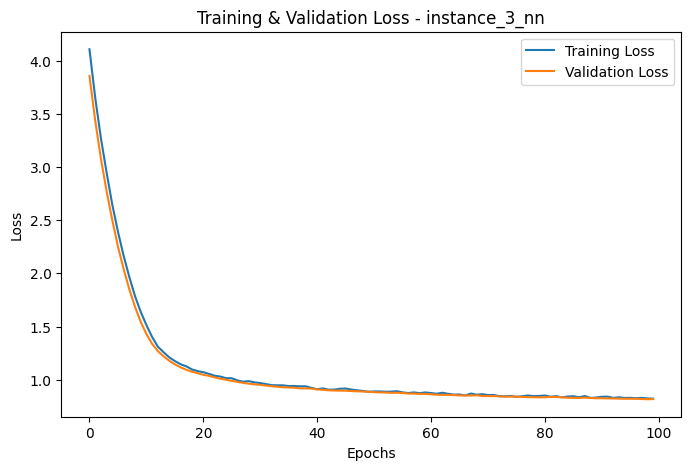

In [ ]:
# Plot training history for each instance
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Training & Validation Loss - {name}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()